In [2]:
# Реализовать быстрое преобразование Фурье (кули-тьюки)
# Спектральная фильтрация смеси сигналов

#sin(50 герц) + sin(200 герц) + шум

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 200 * t)

In [11]:
f_clean = f
noise = 2.5 * np.random.randn(len(t))
f = f + noise

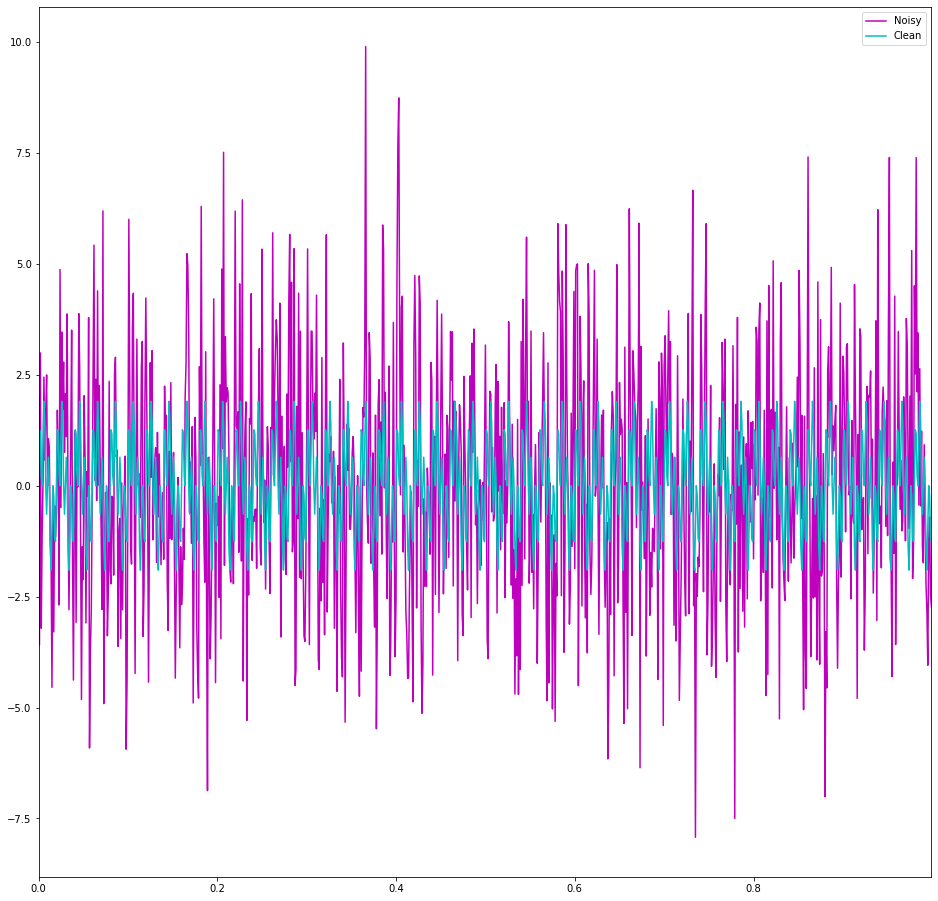

In [18]:
plt.figure(figsize=(16, 16))
plt.plot(t, f, color='m', label='Noisy')
plt.plot(t, f_clean, color='c', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

In [23]:
n = len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n
freq = (1 / (dt * n)) * np.arange(n)
L = np.arange(1, np.floor(n / 2), dtype='int')

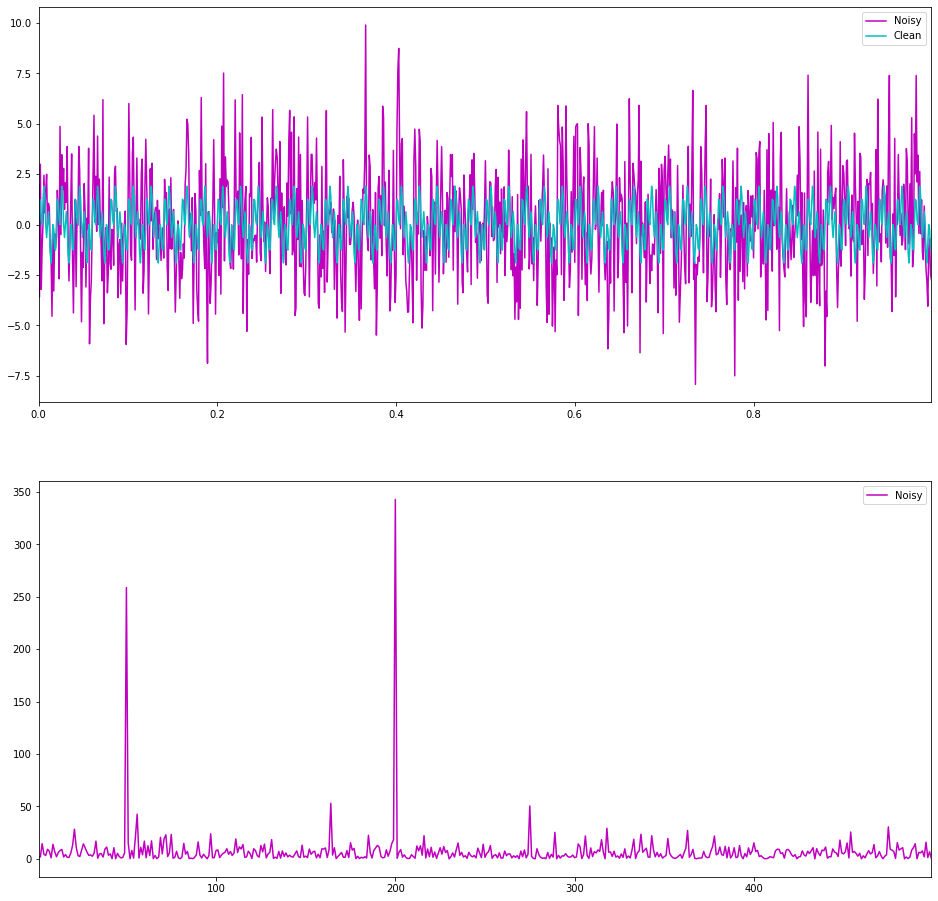

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

plt.sca(axs[0])
plt.plot(t, f, color='m', label='Noisy')
plt.plot(t, f_clean, color='c', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='m', label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

In [33]:
indices = PSD > 100
PSD_clean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

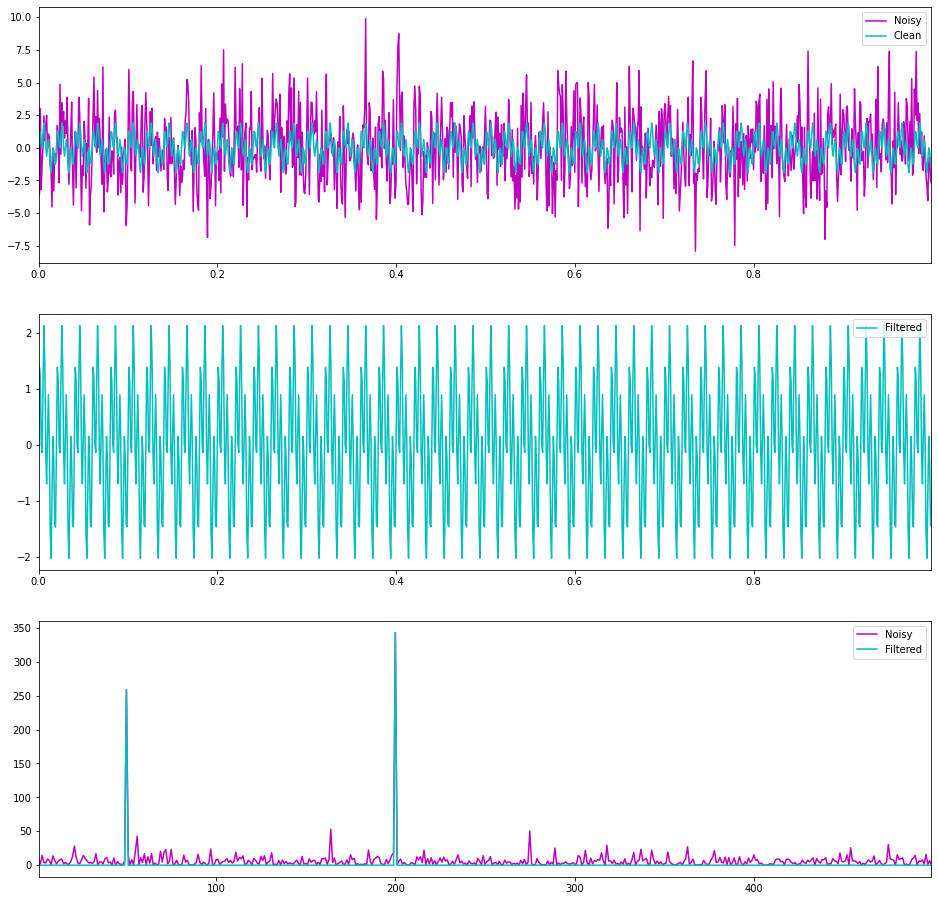

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

plt.sca(axs[0])
plt.plot(t, f, color='m', label='Noisy')
plt.plot(t, f_clean, color='c', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='c', label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='m', label='Noisy')
plt.plot(freq[L], PSD_clean[L], color='c', label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()